In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import norm
import nltk

In [2]:
def plot_hist_with_norm(vals, title, xlabel, ylabel):
    figure = plt.figure(figsize=(12, 8))
    plt.grid(b=True)
    n, bins, patches = plt.hist(vals, bins=np.arange(min(vals), max(vals) + 1), density=True)
    mu = np.mean(vals)
    sigma = np.std(vals)
    y = norm.pdf(bins, mu, sigma)
    normal_curve = plt.plot(bins, y, 'r--', linewidth=2, label='Normal Curve')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.axvline(mu, color='black', linewidth=2, label=f'Mean: {mu}')
    plt.legend()
    plt.show()

In [3]:
col_types = {
    'input': str,
    'name': str,
    'qty': np.float64,
    'range_end': np.float64,
    'unit': str,
    'comment': str
}

In [4]:
df = pd.read_csv('../data/test.csv', index_col=0, na_values=[''], dtype=col_types)
df = df.dropna(subset=['input'])

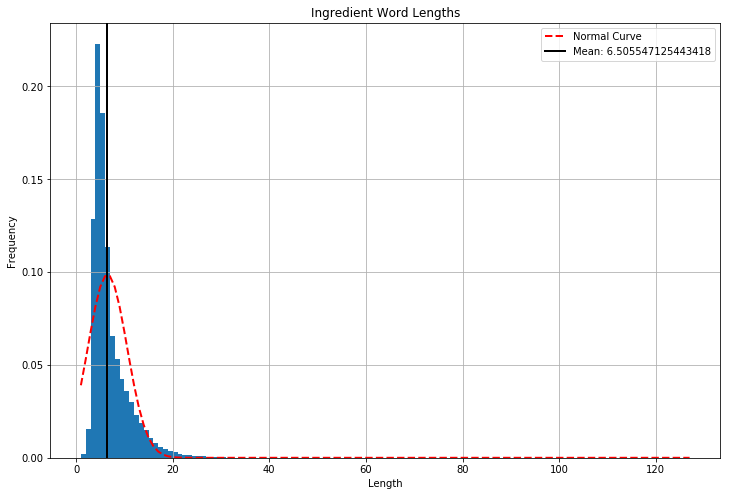

count    199022.000000
mean          6.505547
std           4.045861
min           1.000000
25%           4.000000
50%           5.000000
75%           8.000000
max         127.000000
Name: seq_length, dtype: float64

In [5]:
df['seq_length'] = df['input'].apply(lambda x: len(nltk.word_tokenize(x)))
lengths = df['seq_length'].tolist()
plot_hist_with_norm(lengths, 'Ingredient Word Lengths', 'Length', 'Frequency')
df['seq_length'].describe()